In [1]:
# =====================
# Maze Setup
# =====================


maze = [
    ["A", "0", "0", "1", "0"],
    ["1", "1", "0", "1", "0"],
    ["0", "0", "0", "0", "0"],
    ["0", "1", "1", "1", "0"],
    ["0", "0", "0", "B", "0"]
]
maze1 = [
    ["A", "0", "0", "0", "B"]
]
maze2 = [
    ["A", "0", "0"],
    ["1", "1", "0"],
    ["B", "0", "0"]
]
maze3 = [
    ["A", "0", "B"],
    ["1", "1", "0"],
    ["0", "0", "0"]
]
maze5 = [
    ["A", "0", "0", "0", "0"],
    ["1", "1", "1", "1", "0"],
    ["0", "0", "0", "0", "0"],
    ["0", "1", "1", "1", "1"],
    ["0", "0", "0", "0", "B"]
]
maze4 = [
  ["A","0","0","1","0"],
  ["0","1","0","1","0"],
  ["0","1","0","0","0"],
  ["0","0","0","1","0"],
  ["0","1","0","B","0"]
]
maze7 = [
  ["A","0","0","0","1","0","0"],
  ["1","1","0","1","1","0","1"],
  ["0","0","0","0","0","0","0"],
  ["0","1","1","1","1","1","0"],
  ["0","0","0","0","0","0","0"],
  ["1","0","1","1","1","0","1"],
  ["0","0","0","0","0","B","0"]
]
maze9 = [
  ["A","0","0","0","1","0","0","0","0"],
  ["0","1","1","0","1","0","1","1","0"],
  ["0","1","0","0","0","0","0","1","0"],
  ["0","0","0","1","1","1","0","0","0"],
  ["1","1","0","0","0","0","0","1","0"],
  ["0","0","0","1","1","1","0","1","0"],
  ["0","1","0","0","0","0","0","1","0"],
  ["0","1","1","1","1","1","0","0","0"],
  ["0","0","0","0","0","0","0","B","0"]
]
maze5 = [
  ["A","0","0","1","0"],
  ["0","1","0","1","0"],
  ["0","1","0","0","0"],
  ["0","0","0","1","0"],
  ["0","1","0","B","0"]
]



Optimal path cost (BFS ground truth): 13

Case 0: Manhattan
Path cost: 13
Nodes expanded: 17
Nodes reopened: 0
Is path optimal? -> ✅ Yes


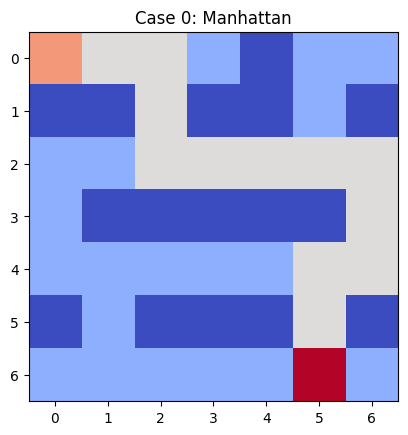


Case 1: Scaled Manhattan (1.5x)
Path cost: 13
Nodes expanded: 16
Nodes reopened: 0
Is path optimal? -> ✅ Yes


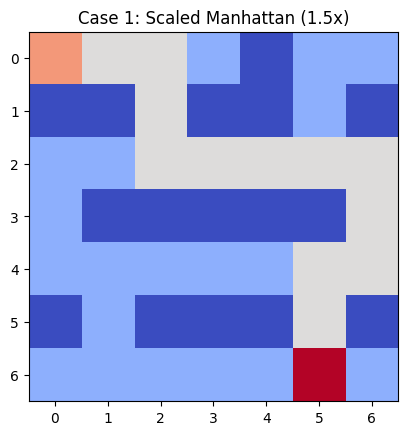


Case 2: Inconsistent heuristic
Path cost: 13
Nodes expanded: 17
Nodes reopened: 0
Is path optimal? -> ✅ Yes


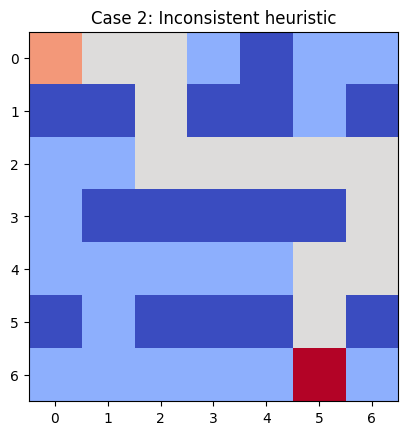

In [ ]:
import heapq
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

# =====================
# Maze Setup
# =====================
rows, cols = len(maze7), len(maze7[0])
moves = [(1,0), (-1,0), (0,1), (0,-1)]
start = None
goal = None
# Locate start (A) and goal (B)
for i in range(rows):
    for j in range(cols):
        if maze7[i][j] == "A":
            start = (i, j)
        if maze7[i][j] == "B":
            goal = (i, j)

# =====================
# Heuristics
# =====================
def manhattan(a, b):
    return abs(a[0]-b[0]) + abs(a[1]-b[1])

def scaled_manhattan(node, goal):
    return 1.5 * manhattan(node, goal)

def inconsistent_heuristic(node, goal):
    h = manhattan(node, goal)
    if node == (0,1):  # deliberately inconsistent
        return 0
    return h

# =====================
# BFS Ground Truth
# =====================
def bfs_shortest_path(maze, start, goal):
    q = deque([(start, 0)])
    visited = {start}
    while q:
        (x, y), d = q.popleft()
        if (x, y) == goal:
            return d
        for dx, dy in moves:
            nx, ny = x+dx, y+dy
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] != "1" and (nx, ny) not in visited:
                visited.add((nx, ny))
                q.append(((nx, ny), d+1))
    return float("inf")

true_cost = bfs_shortest_path(maze7, start, goal)

# =====================
# A* Implementation with stats
# =====================
def astar(maze, start, goal, heuristic_func):
    open_list = []
    heapq.heappush(open_list, (heuristic_func(start, goal), 0, start, [start]))
    g_cost = {start: 0}
    expanded, reopens = 0, 0

    while open_list:
        f, g, node, path = heapq.heappop(open_list)
        expanded += 1

        if node == goal:
            return path, g, expanded, reopens

        for dx, dy in moves:
            nx, ny = node[0]+dx, node[1]+dy
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] != "1":
                new_g = g + 1
                if (nx, ny) not in g_cost or new_g < g_cost[(nx, ny)]:
                    if (nx, ny) in g_cost:  # true reopen
                        reopens += 1
                    g_cost[(nx, ny)] = new_g
                    new_f = new_g + heuristic_func((nx, ny), goal)
                    heapq.heappush(open_list, (new_f, new_g, (nx, ny), path + [(nx, ny)]))

    return None, float("inf"), expanded, reopens

# =====================
# Visualization
# =====================
def visualize(maze, path, title="Path found"):
    maze_array = np.zeros((rows, cols))
    for i in range(rows):
        for j in range(cols):
            if maze[i][j] == "1":
                maze_array[i][j] = -1  # wall
            if (i, j) == start:
                maze_array[i][j] = 2  # start
            if (i, j) == goal:
                maze_array[i][j] = 3  # goal

    for (x, y) in path:
        if (x, y) not in [start, goal]:
            maze_array[x][y] = 1  # path

    plt.imshow(maze_array, cmap="coolwarm", origin="upper")
    plt.title(title)
    plt.show()

# =====================
# Run Cases
# =====================
cases = {
    "Case 0: Manhattan": manhattan,
    "Case 1: Scaled Manhattan (1.5x)": scaled_manhattan,
    "Case 2: Inconsistent heuristic": inconsistent_heuristic
}

print("Optimal path cost (BFS ground truth):", true_cost)

for name, heuristic_func in cases.items():
    path, cost, expanded, reopens = astar(maze7, start, goal, heuristic_func)
    is_optimal = (cost == true_cost)

    print(f"\n{name}")
    print("Path cost:", cost)
    print("Nodes expanded:", expanded)
    print("Nodes reopened:", reopens)
    print("Is path optimal? ->", "✅ Yes" if is_optimal else "❌ No")

    visualize(maze7, path, title=name)

Optimal path cost (BFS ground truth): 6

Case 0: Manhattan
Path cost: 6
Nodes expanded: 7
Nodes reopened: 0
Is path optimal? -> ✅ Yes


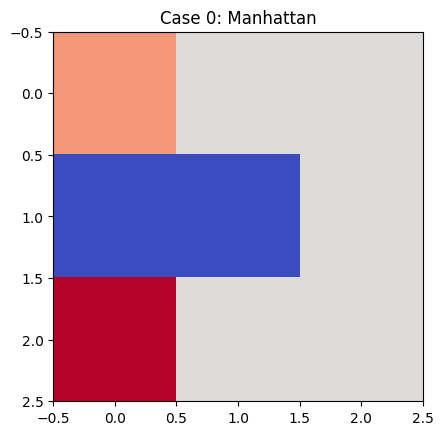


Case 1: Scaled Manhattan (1.5x)
Path cost: 6
Nodes expanded: 7
Nodes reopened: 0
Is path optimal? -> ✅ Yes


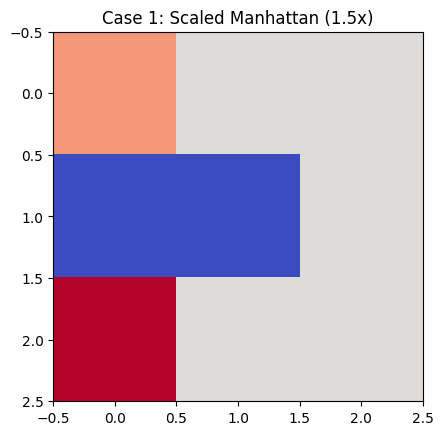


Case 2: Inconsistent heuristic
Path cost: 6
Nodes expanded: 7
Nodes reopened: 0
Is path optimal? -> ✅ Yes


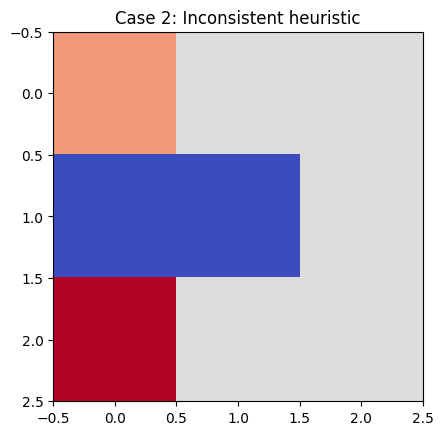

In [5]:
rows, cols = len(maze2), len(maze2[0])
moves = [(1,0), (-1,0), (0,1), (0,-1)]
start = None
goal = None
# Locate start (A) and goal (B)
for i in range(rows):
    for j in range(cols):
        if maze2[i][j] == "A":
            start = (i, j)
        if maze2[i][j] == "B":
            goal = (i, j)


true_cost = bfs_shortest_path(maze2, start, goal)
# =====================
# Run Cases
# =====================
cases = {
    "Case 0: Manhattan": manhattan,
    "Case 1: Scaled Manhattan (1.5x)": scaled_manhattan,
    "Case 2: Inconsistent heuristic": inconsistent_heuristic
}

print("Optimal path cost (BFS ground truth):", true_cost)

for name, heuristic_func in cases.items():
    path, cost, expanded, reopens = astar(maze2, start, goal, heuristic_func)
    is_optimal = (cost == true_cost)

    print(f"\n{name}")
    print("Path cost:", cost)
    print("Nodes expanded:", expanded)
    print("Nodes reopened:", reopens)
    print("Is path optimal? ->", "✅ Yes" if is_optimal else "❌ No")

    visualize(maze2, path, title=name)

Optimal path cost (BFS ground truth): 2

Case 0: Manhattan
Path cost: 2
Nodes expanded: 3
Nodes reopened: 0
Is path optimal? -> ✅ Yes


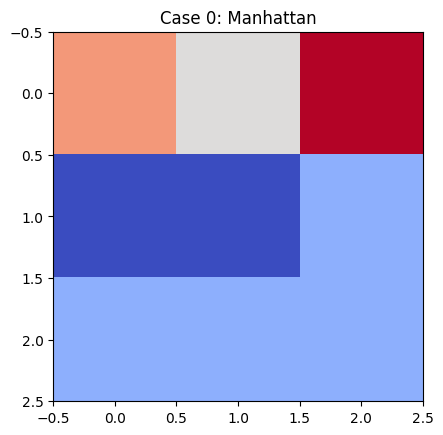


Case 1: Scaled Manhattan (1.5x)
Path cost: 2
Nodes expanded: 3
Nodes reopened: 0
Is path optimal? -> ✅ Yes


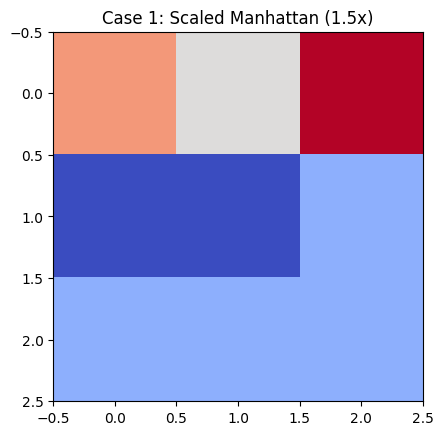


Case 2: Inconsistent heuristic
Path cost: 2
Nodes expanded: 3
Nodes reopened: 0
Is path optimal? -> ✅ Yes


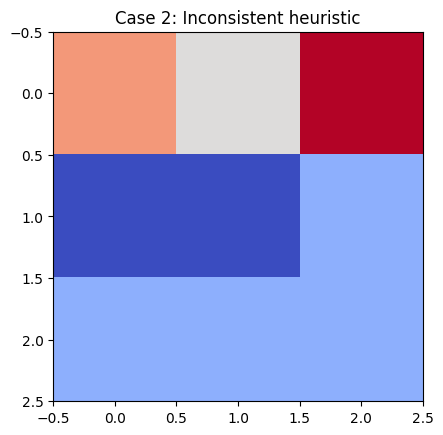

In [6]:
rows, cols = len(maze3), len(maze3[0])
moves = [(1,0), (-1,0), (0,1), (0,-1)]

# Locate start (A) and goal (B)
for i in range(rows):
    for j in range(cols):
        if maze3[i][j] == "A":
            start = (i, j)
        if maze3[i][j] == "B":
            goal = (i, j)
true_cost = bfs_shortest_path(maze3, start, goal)
# =====================
# Run Cases
# =====================
cases = {
    "Case 0: Manhattan": manhattan,
    "Case 1: Scaled Manhattan (1.5x)": scaled_manhattan,
    "Case 2: Inconsistent heuristic": inconsistent_heuristic
}

print("Optimal path cost (BFS ground truth):", true_cost)

for name, heuristic_func in cases.items():
    path, cost, expanded, reopens = astar(maze3, start, goal, heuristic_func)
    is_optimal = (cost == true_cost)

    print(f"\n{name}")
    print("Path cost:", cost)
    print("Nodes expanded:", expanded)
    print("Nodes reopened:", reopens)
    print("Is path optimal? ->", "✅ Yes" if is_optimal else "❌ No")

    visualize(maze3, path, title=name)

Optimal path cost (BFS ground truth): 7

Case 0: Manhattan
Path cost: 7
Nodes expanded: 14
Nodes reopened: 0
Is path optimal? -> ✅ Yes


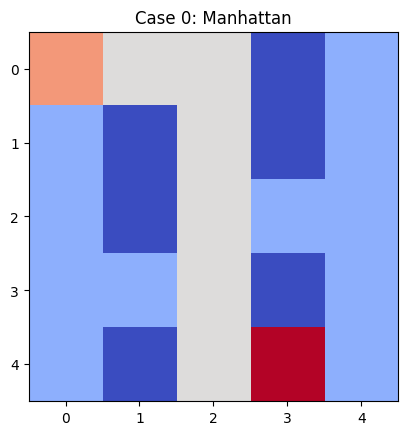


Case 1: Scaled Manhattan (1.5x)
Path cost: 7
Nodes expanded: 9
Nodes reopened: 0
Is path optimal? -> ✅ Yes


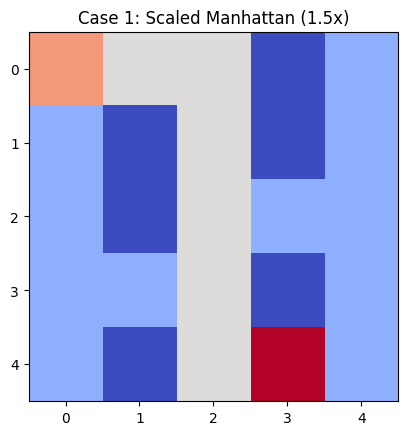


Case 2: Inconsistent heuristic
Path cost: 7
Nodes expanded: 14
Nodes reopened: 0
Is path optimal? -> ✅ Yes


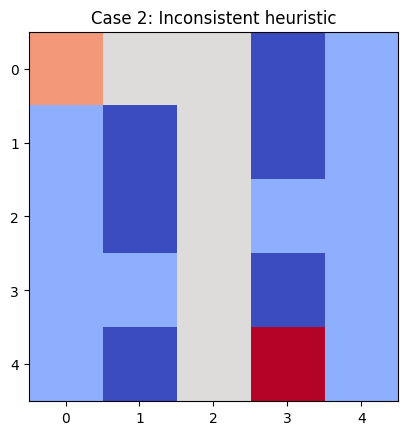

In [7]:
rows, cols = len(maze4), len(maze4[0])
moves = [(1,0), (-1,0), (0,1), (0,-1)]

# Locate start (A) and goal (B)
for i in range(rows):
    for j in range(cols):
        if maze4[i][j] == "A":
            start = (i, j)
        if maze4[i][j] == "B":
            goal = (i, j)
true_cost = bfs_shortest_path(maze4, start, goal)
# =====================
# Run Cases
# =====================
cases = {
    "Case 0: Manhattan": manhattan,
    "Case 1: Scaled Manhattan (1.5x)": scaled_manhattan,
    "Case 2: Inconsistent heuristic": inconsistent_heuristic
}

print("Optimal path cost (BFS ground truth):", true_cost)

for name, heuristic_func in cases.items():
    path, cost, expanded, reopens = astar(maze4, start, goal, heuristic_func)
    is_optimal = (cost == true_cost)

    print(f"\n{name}")
    print("Path cost:", cost)
    print("Nodes expanded:", expanded)
    print("Nodes reopened:", reopens)
    print("Is path optimal? ->", "✅ Yes" if is_optimal else "❌ No")

    visualize(maze4, path, title=name)

Optimal path cost (BFS ground truth): 7

Case 0: Manhattan
Path cost: 7
Nodes expanded: 14
Nodes reopened: 0
Is path optimal? -> ✅ Yes


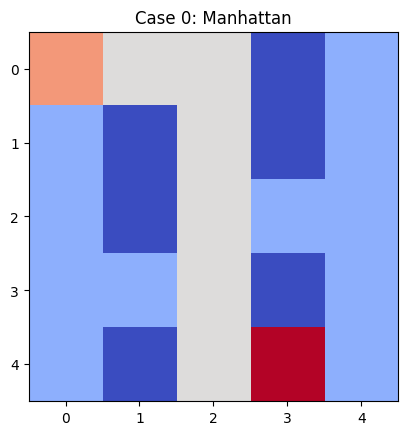


Case 1: Scaled Manhattan (1.5x)
Path cost: 7
Nodes expanded: 9
Nodes reopened: 0
Is path optimal? -> ✅ Yes


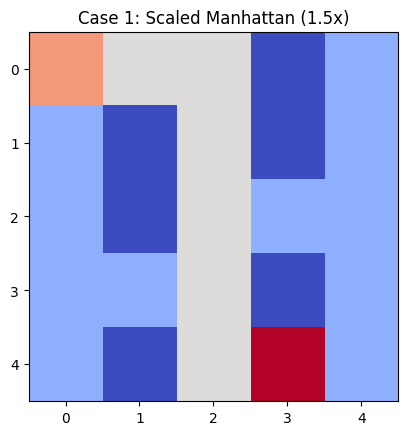


Case 2: Inconsistent heuristic
Path cost: 7
Nodes expanded: 14
Nodes reopened: 0
Is path optimal? -> ✅ Yes


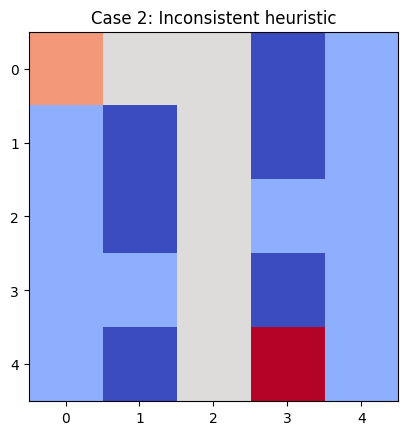

In [9]:
rows, cols = len(maze5), len(maze5[0])
moves = [(1,0), (-1,0), (0,1), (0,-1)]

# Locate start (A) and goal (B)
for i in range(rows):
    for j in range(cols):
        if maze5[i][j] == "A":
            start = (i, j)
        if maze5[i][j] == "B":
            goal = (i, j)
true_cost = bfs_shortest_path(maze5, start, goal)
# =====================
# Run Cases
# =====================
cases = {
    "Case 0: Manhattan": manhattan,
    "Case 1: Scaled Manhattan (1.5x)": scaled_manhattan,
    "Case 2: Inconsistent heuristic": inconsistent_heuristic
}

print("Optimal path cost (BFS ground truth):", true_cost)

for name, heuristic_func in cases.items():
    path, cost, expanded, reopens = astar(maze5, start, goal, heuristic_func)
    is_optimal = (cost == true_cost)

    print(f"\n{name}")
    print("Path cost:", cost)
    print("Nodes expanded:", expanded)
    print("Nodes reopened:", reopens)
    print("Is path optimal? ->", "✅ Yes" if is_optimal else "❌ No")

    visualize(maze5, path, title=name)

Optimal path cost (BFS ground truth): 15

Case 0: Manhattan
Path cost: 15
Nodes expanded: 32
Nodes reopened: 0
Is path optimal? -> ✅ Yes


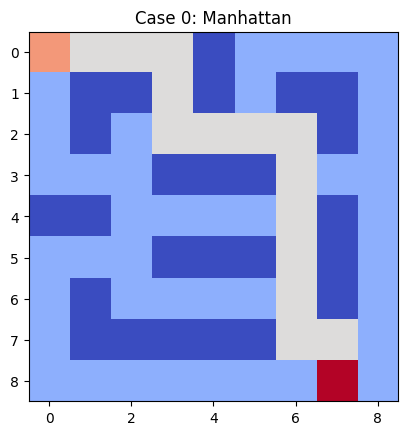


Case 1: Scaled Manhattan (1.5x)
Path cost: 15
Nodes expanded: 17
Nodes reopened: 0
Is path optimal? -> ✅ Yes


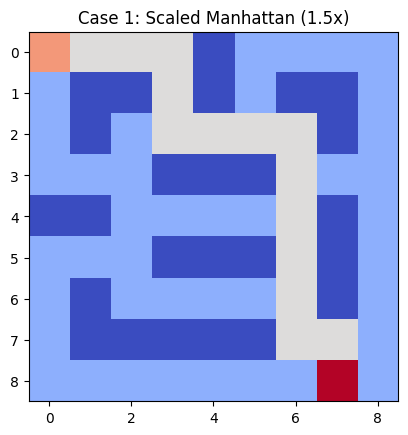


Case 2: Inconsistent heuristic
Path cost: 15
Nodes expanded: 32
Nodes reopened: 0
Is path optimal? -> ✅ Yes


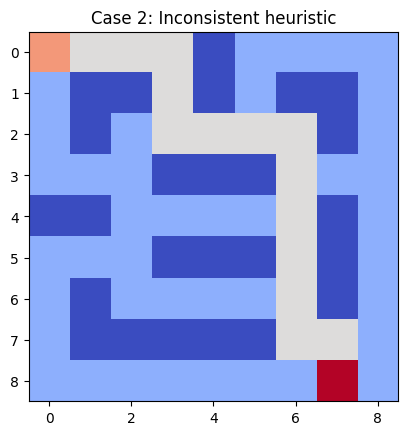

In [11]:
rows, cols = len(maze9), len(maze9[0])
moves = [(1,0), (-1,0), (0,1), (0,-1)]

# Locate start (A) and goal (B)
for i in range(rows):
    for j in range(cols):
        if maze9[i][j] == "A":
            start = (i, j)
        if maze9[i][j] == "B":
            goal = (i, j)
true_cost = bfs_shortest_path(maze9, start, goal)
# =====================
# Run Cases
# =====================
cases = {
    "Case 0: Manhattan": manhattan,
    "Case 1: Scaled Manhattan (1.5x)": scaled_manhattan,
    "Case 2: Inconsistent heuristic": inconsistent_heuristic
}

print("Optimal path cost (BFS ground truth):", true_cost)

for name, heuristic_func in cases.items():
    path, cost, expanded, reopens = astar(maze9, start, goal, heuristic_func)
    is_optimal = (cost == true_cost)

    print(f"\n{name}")
    print("Path cost:", cost)
    print("Nodes expanded:", expanded)
    print("Nodes reopened:", reopens)
    print("Is path optimal? ->", "✅ Yes" if is_optimal else "❌ No")

    visualize(maze9, path, title=name)